In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
DATA_PATH = 'names\\'
YEARS = range(1900, 2001)

In [197]:
# Почему это не работает? Почему read_csv считает строку file как байтовую строку?
# df = pd.concat([pd.read_csv(file) for file in os.listdir(DATA_PATH) if os.path.splitext(file)[1] == '.txt'])
all_data = {year: pd.read_csv(DATA_PATH + 'yob' + str(year) + '.txt',
                                names=['Name','Gender','Count']) for year in YEARS}
df = pd.concat(all_data, names=['Year', 'Pos'])
df.head()

Name Gender  Count
Year Pos                        
1900 0        Mary      F  16706
     1       Helen      F   6343
     2        Anna      F   6114
     3    Margaret      F   5304
     4        Ruth      F   4765

In [198]:
name_dynamics = df.groupby(by=[df.index.get_level_values(0), 'Name']).sum()
name_dynamics.head()

Count
Year Name        
1900 Aaron    103
     Abbie    112
     Abby       7
     Abe       56
     Abel      15

In [84]:
# Почему тут нельзя сделать по-обычному, без query? Потому что Name теперь индекс и по нему нельзя обратиться?
# name_dynamics[name_dynamics['Name'] == ['Ruth', 'Robert']]
rr = name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name')
rr.head()

Count        
Name  Robert    Ruth
Year                
1900  3845.0  4781.0
1901  2559.0  3989.0
1902  3201.0  4401.0
1903  3057.0  4531.0
1904  3427.0  4915.0

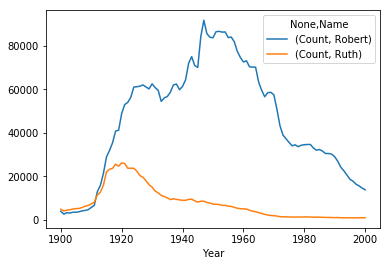

In [85]:
rr.plot();

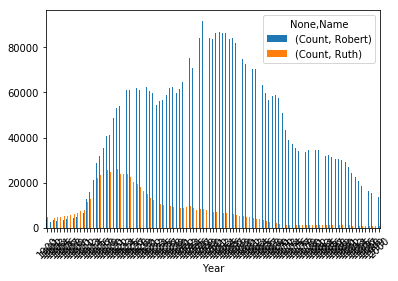

In [106]:
# Почему не работает указать xticks? Разве нельзя без модификации датасета и изменять только отображение на графике?
rr.plot.bar(xticks=range(1900, 2001, 50), rot=45);

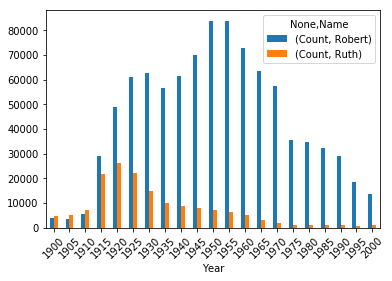

In [110]:
rr.query('Year%5 == 0').plot.bar(rot=45);

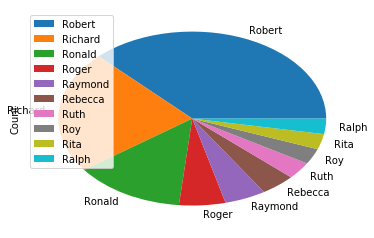

In [167]:
# Не понял, как изящно тут отфильтровать из уже загруженных в память данных. Даже не знаю, где такую вещь загуглить.
# df[df['Name'].str.startswith('R') & pd.Series(df.index == 1950)]
topr = pd.read_csv(DATA_PATH + 'yob1950.txt', names=['Name','Gender','Count'])
pie = topr[topr['Name'].str.startswith('R')].groupby(by='Name').sum().sort_values(by='Count', ascending=False).head(10)
pie.plot.pie(y='Count');

In [200]:
def consonants_count(word):
    result = len([letter for letter in word.lower() if letter not in 'aieou'])
    return result

# Почему нельзя применить apply к индексу?
# name_dynamics.index.get_level_values(-1).apply(consonants_count)

# Почему apply здесь возвращает столбец NaN?
# name_dynamics['Consonants'] = name_dynamics.reset_index()['Name'].apply(consonants_count)

name_dynamics.reset_index(inplace=True)
name_dynamics.head()

,Year,Name,Count
0,1900,Aaron,103
1,1900,Abbie,112
2,1900,Abby,7
3,1900,Abe,56
4,1900,Abel,15


In [209]:
# Не понял, почему тут не группируется по именам, а группируется по связке год-имя?
name_dynamics['Consonants'] = name_dynamics['Name'].apply(consonants_count)
name_dynamics.groupby('Name').sum()
name_dynamics.head()

,Year,Name,Count,Consonants
0,1900,Aaron,103,2
1,1900,Abbie,112,2
2,1900,Abby,7,3
3,1900,Abe,56,1
4,1900,Abel,15,2


In [207]:
# Поскольку только по имени не могу сгруппировать, попробую заново обработать данные
name_dynamics['Name'].value_counts()

Ollie         101
Bella         101
Dina          101
Clyde         101
Edwina        101
Alfred        101
Norma         101
Edmond        101
Carl          101
Rex           101
Mildred       101
James         101
Issac         101
Kathryn       101
Sophia        101
Marvel        101
Nova          101
Phoebe        101
Belle         101
Adelle        101
Nina          101
Wendell       101
Manuel        101
Evert         101
Flora         101
Cora          101
Francisca     101
Seth          101
Grace         101
Zeb           101
             ... 
Lavonde         1
Myrlen          1
Anke            1
Baruc           1
Sashi           1
Marschell       1
Raymonte        1
Drakar          1
Erkan           1
Kizi            1
Trasi           1
Mckynlee        1
Sonica          1
Kristjana       1
Quetzy          1
Kirbee          1
Slayden         1
Shawnteria      1
Suany           1
Breara          1
Fantaysia       1
Vitula          1
Suliana         1
Shinetta        1
Demeri    

In [210]:
cons_data = pd.concat([pd.read_csv(DATA_PATH + 'yob' + str(year) + '.txt',
                                names=['Name','Gender','Count']) for year in YEARS],
                     names=['Name','Gender','Count'])
cons_data.head()

,Name,Gender,Count
0,Mary,F,16706
1,Helen,F,6343
2,Anna,F,6114
3,Margaret,F,5304
4,Ruth,F,4765


In [211]:
cons_data['Consonants'] = cons_data['Name'].apply(consonants_count)
cons_data.head()

,Name,Gender,Count,Consonants
0,Mary,F,16706,3
1,Helen,F,6343,3
2,Anna,F,6114,2
3,Margaret,F,5304,5
4,Ruth,F,4765,3


In [213]:
cons_data.groupby('Name').agg({'Count': np.sum, 'Consonants': np.mean})
cons_data.head()

,Name,Gender,Count,Consonants
0,Mary,F,16706,3
1,Helen,F,6343,3
2,Anna,F,6114,2
3,Margaret,F,5304,5
4,Ruth,F,4765,3


In [214]:
# такое чувство, что тут groupby тоже не сработал - иначе каждого имени было бы по одному. Почему он не сработал?
cons_data['Name'].value_counts()

Thomas        202
Robert        202
William       202
Cleo          202
Charlie       202
Sammie        202
Lacy          202
Marion        202
Jewel         202
Ruby          202
Jessie        202
Alva          202
Sidney        202
Dale          202
Jimmie        202
Johnnie       202
Tommie        202
James         202
Carmen        202
Lee           202
Jonnie        202
Jesse         202
Henry         202
Jewell        202
Elizabeth     202
Paul          202
Ivory         202
Francis       202
Leslie        202
George        202
             ... 
Ales            1
Brenard         1
Kalysia         1
Rennis          1
Shantya         1
Elizaberh       1
Meyanna         1
Khaira          1
Catine          1
Monja           1
Kaiza           1
Natesa          1
Lashinda        1
Kneisha         1
Shaqula         1
Cleal           1
Kanta           1
Dedera          1
Glenalee        1
Larnette        1
Edmont          1
Mondra          1
Odbert          1
Lowrine         1
Fracisco  

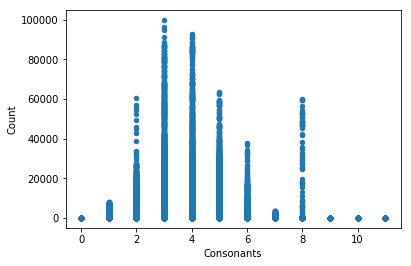

In [216]:
cons_data.plot.scatter(x='Consonants', y='Count');